## Sofiia Druchyna
## CMPS 3160: Intro to Data Science 
## Who Do Threat Actors Target in the Cyberspace? What Are They Looking For?

In [2]:
!ls

DSProject.ipynb      FullAttackList.csv   FullThreatActors.csv


In this project, I am planning to use CISSM Cyber Events Dataset. <br>
The information in the dataset brings together open-source information surrounding a range of publically acknowledged cyber events on private and public organizations. <br> 
Events from 2014 through present have been coded to standardize information on threat actor, threat actor country, motive, target, end effects, industry, and country of impact.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_threats = pd.read_csv('./FullThreatActors.csv')
display(df_threats)

/var/folders/w5/1mxj438146l6fspdc4qbjmtm0000gn/T/ipykernel_81161/2226663583.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Name,Country,Actor Type,Established,Last Seen
0,$2a$45,Undetermined,Criminal,NaN,2018-03-09
1,'desserped',Undetermined,Criminal,NaN,2023-10-11
2,0mega,Undetermined,Criminal,NaN,2023-02-20
3,0x0D1337,Undetermined,Undetermined,NaN,2015-09-30
4,0x2Taylor,Undetermined,Hacktivist,NaN,2016-10-13
...,...,...,...,...,...
95,Angel_Of_Truth,Canada,Hacktivist,NaN,2015-04-21
96,AnibaLeaks,Undetermined,Criminal,NaN,2021-09-30
97,Anka Neferler Timi,France,Hacktivist,NaN,2020-12-22
98,AnoaGhost,Undetermined,Undetermined,NaN,2018-04-17


In the first dataset above, we can see all detected <ins>Threat Actors.</ins>

- Question 1. What are the trends among the cyber threat actors (if there are any) regarding the country origin?
- Question 2. What are the trends among the cyber threat actors regarding their type? 
- Question 3. Were the same threat actors seen multiple times?
- Question 4. Did multiple threat actors act around the same time? If so, does it happen more often that not?

In [4]:
unique_df = df_threats.drop_duplicates()
display(unique_df)

,Name,Country,Actor Type,Established,Last Seen
0,$2a$45,Undetermined,Criminal,NaN,2018-03-09
1,'desserped',Undetermined,Criminal,NaN,2023-10-11
2,0mega,Undetermined,Criminal,NaN,2023-02-20
3,0x0D1337,Undetermined,Undetermined,NaN,2015-09-30
4,0x2Taylor,Undetermined,Hacktivist,NaN,2016-10-13
...,...,...,...,...,...
95,Angel_Of_Truth,Canada,Hacktivist,NaN,2015-04-21
96,AnibaLeaks,Undetermined,Criminal,NaN,2021-09-30
97,Anka Neferler Timi,France,Hacktivist,NaN,2020-12-22
98,AnoaGhost,Undetermined,Undetermined,NaN,2018-04-17


From this function, we identify that each attack is unique and that there are no duplicated. Multiple occurences of the same threat actor are not recorded.

In [5]:
df_threats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         100 non-null    object 
 1   Country      100 non-null    object 
 2   Actor Type   100 non-null    object 
 3   Established  0 non-null      float64
 4   Last Seen    100 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


In [6]:
df_threats['Country'].value_counts()

Country
Undetermined                  73
United States of America       5
Iran (Islamic Republic of)     5
Turkey                         2
Israel                         2
France                         2
Russian Federation             2
Armenia                        1
Turkmenistan                   1
South Africa                   1
Italy                          1
India                          1
Ghana                          1
Iraq                           1
Mexico                         1
Canada                         1
Name: count, dtype: int64

As we can see from the output above, most of the threat actors' origins were undetermined. However, it is important to point out that among the ones that were identified, United States and <br>
Iran were in the leading positions.

<Axes: xlabel='Country'>

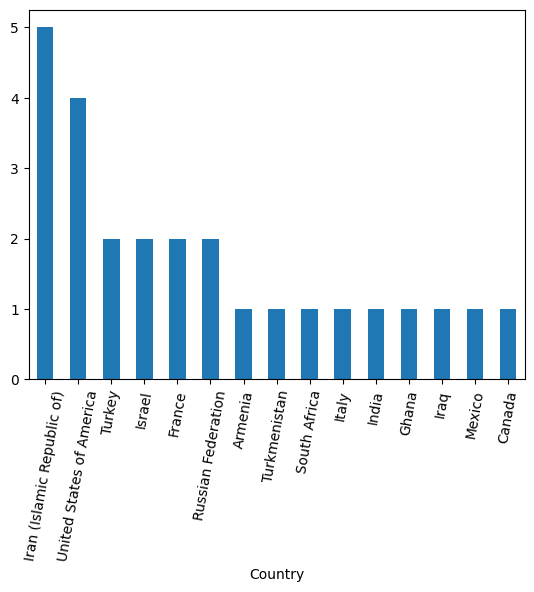

In [7]:
# Clean the data for the following diagrams (remove Undetermined after we identified the amount of untracked threats):

filtered_df = df_threats[df_threats['Country'] != 'Undetermined']
filtered_df = filtered_df[filtered_df['Actor Type'] != 'Undetermined']
filtered_df['Country'].value_counts().plot.bar(rot=80)

In [8]:
us_attacks = filtered_df[filtered_df.Country == "United States of America"]
us_attacks

,Name,Country,Actor Type,Established,Last Seen
53,Abdellah Elmaghribi,United States of America,Hacktivist,NaN,2015-10-15
78,AlfabetoVirtual,United States of America,Hacktivist,NaN,2015-07-10
93,Amped Attacks AKA sgtbilko420,United States of America,Hacktivist,NaN,2015-10-21
99,AnonCoder,United States of America,Hacktivist,NaN,2015-05-23


We can observe that most attacks conducted by United States were actually recorder around the same time: a year of 2015 with the same attack type of hactivism, indicating <br>
that these attacks may be actual series of cybercrime or related to a certain vulnerability present at a time.

In [9]:
iran_attacks = filtered_df[filtered_df.Country == "Iran (Islamic Republic of)"]
iran_attacks

,Name,Country,Actor Type,Established,Last Seen
58,Adalat Ali,Iran (Islamic Republic of),Hacktivist,NaN,2022-02-01
65,Agrius APT,Iran (Islamic Republic of),Nation-State,NaN,2022-02-28
73,al-Tahera,Iran (Islamic Republic of),Hacktivist,NaN,2022-07-12
81,Ali's Justice (Edalat-e Ali),Iran (Islamic Republic of),Hacktivist,NaN,2023-02-11
88,Altahrea Team,Iran (Islamic Republic of),Hacktivist,NaN,2022-07-18


In [10]:
df_threats['Actor Type'].value_counts()

Actor Type
Undetermined    38
Hacktivist      36
Criminal        17
Hobbyist         8
Nation-State     1
Name: count, dtype: int64

<Axes: xlabel='Actor Type'>

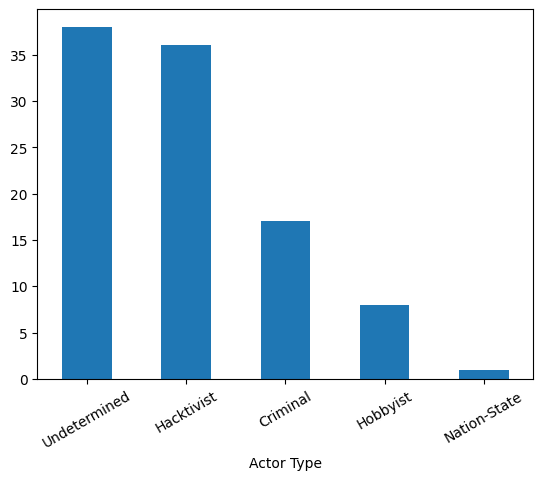

In [11]:
df_threats['Actor Type'].value_counts().plot.bar(rot=30)

Furthermore, from the Attack Type, we can infer that although majority of attacks remained undetermined, one of the leading attack types was <ins>Hactivism</ins>, followed by criminal motives.

In [12]:
pivot_threats = (filtered_df.
                   groupby('Country')['Actor Type'].
                   value_counts())
pivot_threats.to_frame() # FIGURE OUT IF I CAN DO THE MAP OF THE WORLD AND POINT TO THE COUNTRY...

count
Country                    Actor Type         
Armenia                    Hacktivist        1
Canada                     Hacktivist        1
France                     Hacktivist        2
Ghana                      Hacktivist        1
India                      Hacktivist        1
Iran (Islamic Republic of) Hacktivist        4
                           Nation-State      1
Iraq                       Hacktivist        1
Israel                     Hacktivist        2
Italy                      Hacktivist        1
Mexico                     Hacktivist        1
Russian Federation         Criminal          2
South Africa               Criminal          1
Turkey                     Hacktivist        2
Turkmenistan               Hacktivist        1
United States of America   Hacktivist        4

In [ ]:
filtered_df['Year'] = pd.to_datetime(filtered_df['Last Seen']).dt.year
filtered_df['Year'] = filtered_df['Year'].astype(int) # extract the years for the tidier data and our convenience
filtered_df['Year']

In [14]:
threats_cube = filtered_df.pivot_table(
    index="Country", columns=['Actor Type'],
    values='Year', aggfunc='count')                              # how to make this an int?
threats_cube

Actor Type,Criminal,Hacktivist,Nation-State
Country,,,
Armenia,NaN,1.0,NaN
Canada,NaN,1.0,NaN
France,NaN,2.0,NaN
Ghana,NaN,1.0,NaN
India,NaN,1.0,NaN
Iran (Islamic Republic of),NaN,4.0,1.0
Iraq,NaN,1.0,NaN
Israel,NaN,2.0,NaN
Italy,NaN,1.0,NaN


<Figure size 1200x800 with 0 Axes>

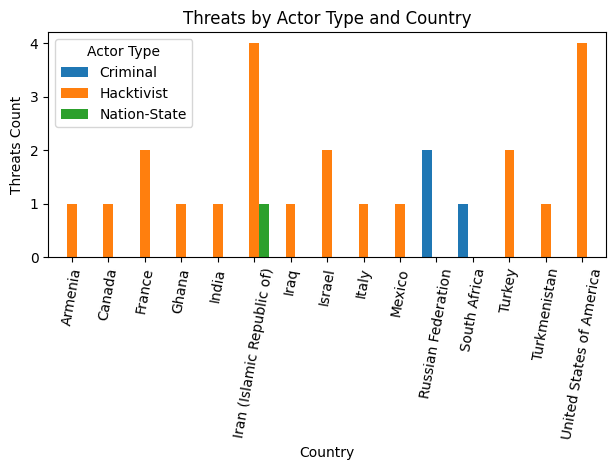

In [15]:
plt.figure(figsize=(12, 8))  # Set figure size

threats_cube.plot.bar(rot=80, width = 0.8)
plt.xlabel('Country')
plt.ylabel('Threats Count')
plt.title('Threats by Actor Type and Country')
plt.legend(title='Actor Type')
plt.tight_layout()
plt.show()

This graph allows us to see different Actor Types per each country, so we can make conclusions about the types of cyber attacks (or threat actors) that each country is conducting.

In the next dataset, we can see all detected <ins>CyberAttacks.</ins> This dataset is especially interesting for the data analysis as there are several characteristics that we can try to find
correlation among. <br>
- Question 1. When did most attacks occur?
- Question 2. What was the most common victim? Did those victims vary by their income?
- Question 3. What industry was targeted the most?
- Question 4. What are some of the most common actor locations?
- Question 5. What are some of the most common motives?
- Question 6. What are some of the most common attack types? And what were the sub-types of those attacks?
- Question 7. Is there a correlation among all these variables? 


In [16]:
df_attack = pd.read_csv('./FullAttackList.csv')
df_attack

,Date,Location,Victim,Industry,Actor Location,Actor,Motive,Type,Sub-Type
0,2023-10-31,United States of America,Smoothie King,Accommodation and Food Services,Undetermined,Undetermined,Financial,Exploitive,Undetermined
1,2023-10-31,Italy,Avangate,Other Services (except Public Administration),Undetermined,Alpha Team,Financial,Mixed,Data Attack
2,2023-10-30,United States of America,Dallas County,Public Administration,Undetermined,PLAY,Financial,Mixed,Data Attack
3,2023-10-30,Russian Federation,National Payment Card System (NSPK),Finance and Insurance,Ukraine,DumpForums and Ukrainian Cyber Alliance,Protest,Disruptive,Message Manipulation
4,2023-10-30,Germany,Südwestfalen IT,"Professional, Scientific, and Technical Services",Undetermined,Undetermined,Financial,Mixed,Data Attack
...,...,...,...,...,...,...,...,...,...
295,2023-09-12,United States of America,East Jackson Community Schools,Educational Services,Undetermined,Undetermined,Undetermined,Undetermined,Undetermined
296,2023-09-12,Colombia,IFX Networks Colombia,Information,Undetermined,Ransom House,Financial,Mixed,Data Attack
297,2023-09-12,Italy,SDA,Transportation and Warehousing,Italy,ADHD,Protest,Mixed,Data Attack
298,2023-09-12,United States of America,Fauquier County Public Schools,Educational Services,Undetermined,LockBit 3.0,Financial,Mixed,Data Attack


In [17]:
df_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            300 non-null    object
 1   Location        300 non-null    object
 2   Victim          300 non-null    object
 3   Industry        299 non-null    object
 4   Actor Location  300 non-null    object
 5   Actor           300 non-null    object
 6   Motive          300 non-null    object
 7   Type            300 non-null    object
 8   Sub-Type        300 non-null    object
dtypes: object(9)
memory usage: 21.2+ KB


In [18]:
df_attack.describe()

,Date,Location,Victim,Industry,Actor Location,Actor,Motive,Type,Sub-Type
count,300,300,300,299,300,300,300,300,300
unique,49,36,299,18,10,58,6,4,11
top,2023-09-15,United States of America,Manchester Airport,Health Care and Social Assistance,Undetermined,Undetermined,Financial,Exploitive,Data Attack
freq,21,158,2,65,242,113,222,128,114


<Axes: xlabel='Location'>

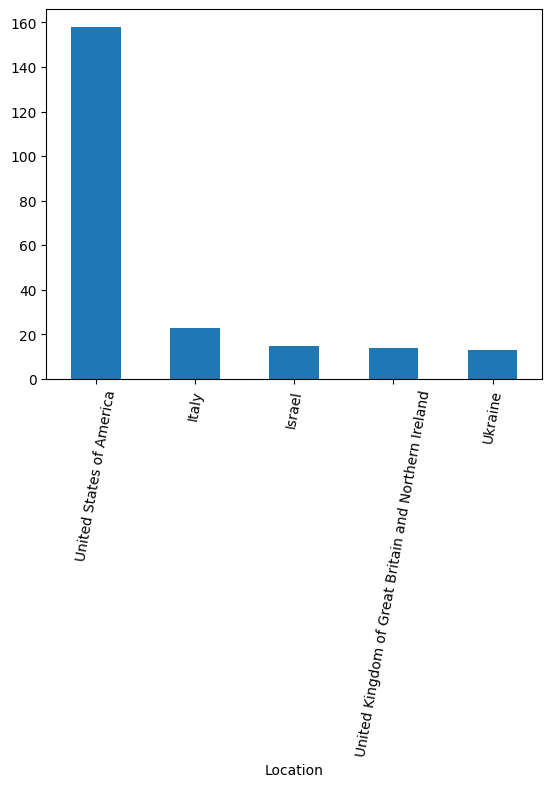

In [19]:
df_attack['Location'].value_counts().head().plot.bar(rot=80) # Figure out how to cut long values (map?)

From this table we can see that the most attacks occured on United States, followed by Italy, Israel, UK, and Ukraine. However, US has definitely been attacked the most often.

<Axes: xlabel='Industry'>

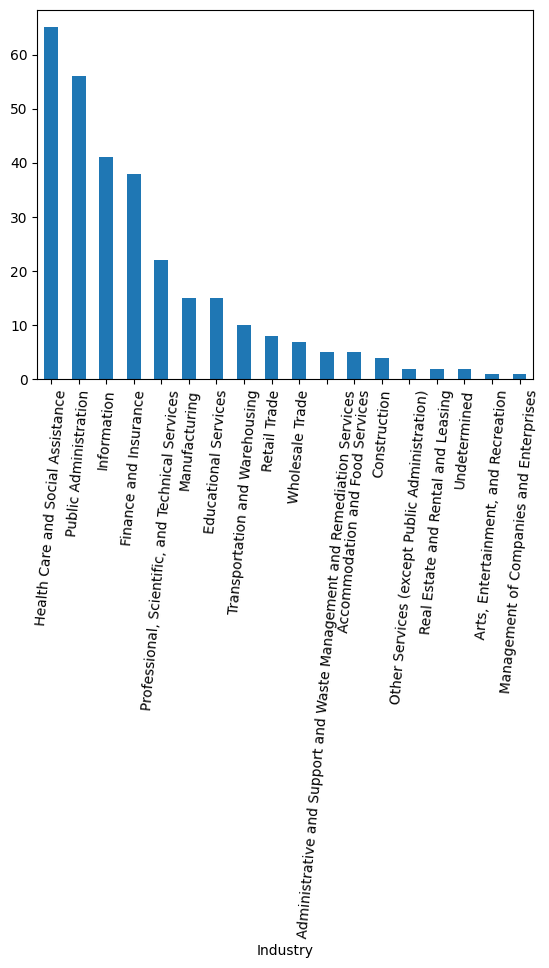

In [20]:
df_attack['Industry'].value_counts().plot.bar(rot=85) # Figure out how to cut long values (map?)

<Axes: xlabel='Actor Location'>

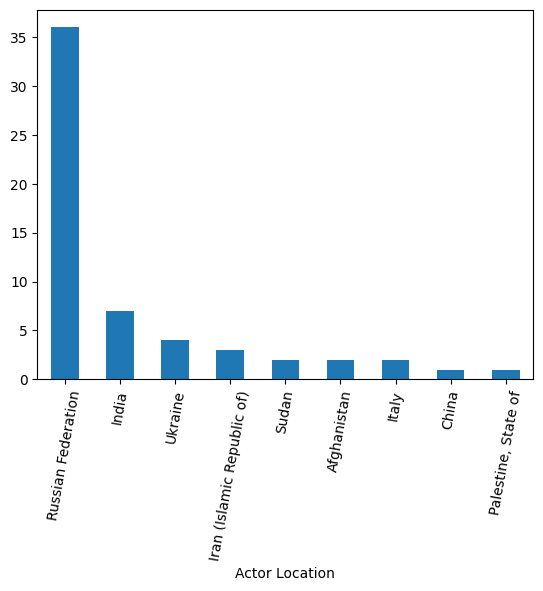

In [21]:
filtered_att = df_attack[df_attack['Actor Location'] != 'Undetermined']
filtered_att['Actor Location'].value_counts().plot.bar(rot=80)

This graph clearly displays that most recent attacks originated from the Russian Federation and India, followed by Ukraine and Iran.

In [22]:
filtered_att = df_attack[df_attack['Actor'] != 'Undetermined']
filtered_att['Actor'].value_counts().head()

Actor
Cl0p                                                                        41
PLAY                                                                        15
GRU Main Special Center for Special Technologies (Unit 74455) (SANDWORM)    11
LockBit 3.0                                                                  8
Knight                                                                       7
Name: count, dtype: int64

<Axes: xlabel='Motive'>

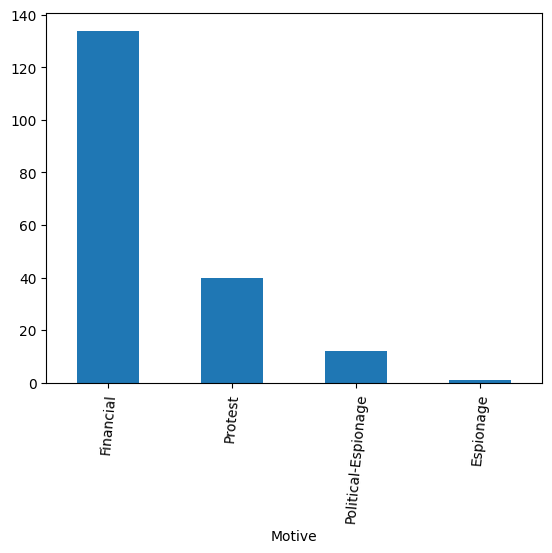

In [23]:
filtered_att['Motive'].value_counts().plot.bar(rot=85)

As we can see, one of the most prevalent motives was financial, followed by the protests. This is a common trend in most cyberattacks as actors go after financial benefit in most cases, trying to extort private data.

<Axes: xlabel='Type'>

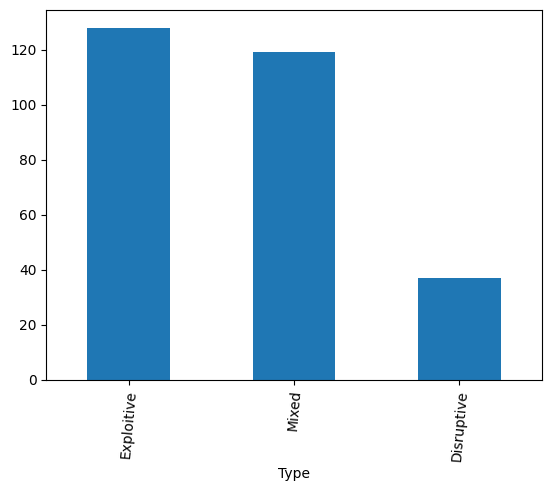

In [24]:
filtered_att = df_attack[df_attack['Type'] != 'Undetermined']
filtered_att['Type'].value_counts().plot.bar(rot=85)

The type of every cyberattack follows the primary motives of the attacker, so, as we identified "Financial" motive as the leading factor, we can also observe that the "Exploitive" type of the attack follows the cause since attackers are trying to extort some sensitive data by exploiting the victim systems.

In [25]:
filtered_att['Year'] = pd.to_datetime(filtered_att['Date']).dt.year
filtered_att['Year'] = filtered_att['Year'].astype(int) # extract the years for the tidier data and our convenience
filtered_att['Year']

/var/folders/w5/1mxj438146l6fspdc4qbjmtm0000gn/T/ipykernel_81161/547347635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_att['Year'] = pd.to_datetime(filtered_att['Date']).dt.year
/var/folders/w5/1mxj438146l6fspdc4qbjmtm0000gn/T/ipykernel_81161/547347635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_att['Year'] = filtered_att['Year'].astype(int) # extract the years for the tidier data and our convenience


0      2023
1      2023
2      2023
3      2023
4      2023
       ... 
294    2023
296    2023
297    2023
298    2023
299    2023
Name: Year, Length: 284, dtype: int64

In [26]:
attack_cube = filtered_att.pivot_table(
    index="Location", columns=['Industry', 'Actor Location', 'Motive', 'Type'],
    values='Year', aggfunc='count')                              # how to make this an int?
attack_cube

Industry                                           Accommodation and Food Services  \
Actor Location                                                  Russian Federation   
Motive                                                                   Financial   
Type                                                                         Mixed   
Location                                                                             
Australia                                                                      NaN   
Austria                                                                        NaN   
Brazil                                                                         NaN   
Canada                                                                         NaN   
Chile                                                                          NaN   
China                                                                          NaN   
Colombia                                                                       NaN   
Dominican Republic                                                             NaN   
Finland                                                                        NaN   
France                                                                         NaN   
Germany                                                                        1.0   
Hong Kong                                                                      NaN   
India                                                                          NaN   
Israel                                                                         NaN   
Italy                                                                          NaN   
Japan                                                                          NaN   
Korea (the Republic of)                                                        NaN   
Kuwait                                                                         NaN   
Mexico                                                                         NaN   
New Zealand                                                                    NaN   
Norway                                                                         NaN   
Palestine, State of                                                            NaN   
Philippines                                                                    NaN   
Portugal                                                                       NaN   
Russian Federation                                                             NaN   
Singapore                                                                      NaN   
Spain                                                                          NaN   
Sri Lanka                                                                      NaN   
Sweden                                                                         NaN   
Taiwan (Province of China)                                                     NaN   
Thailand                                                                       NaN   
Ukraine                                                                        NaN   
Undetermined                                                                   NaN   
United Kingdom of Great Britain and Northern Ir...                             NaN   
United States of America                                                       NaN   

Industry                                                               \
Actor Location                                     Undetermined         
Motive                                                Financial         
Type                                                 Exploitive Mixed   
Location                                                                
Australia                                                   NaN   NaN   
Austria                                                     NaN   NaN   
Brazil                                          

In the future milestones, I am planning to provide visualization on the various categories of attackers and cyber crimes and see the existing trends in the ongoing cybercrimes. <br>
Further, it would be interesting to track which attackers caused the most impactful harm to their victims and try to identify the main aspects that led to that conclusion. <br>

One of the future steps would also try to dive into the specic category of victims (e.g. specific Industry sector) and analyze the occuring cybercrimes and their trends. <br> 
(Potentially will choose the healthcare dataset: <ins>U.S. Department of Health and Human Services Office for Civil Rights' Breach Portal </ins> )